In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [41]:
data = pd.concat((pd.read_csv('../data/heart_train.csv'),pd.read_csv('../data/heart_test.csv')))

In [42]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [21]:
data.shape

(303, 14)

In [22]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [25]:
def plot_feature_distribution(df, features):
    fig, ax = plt.subplots(7,2,figsize=(18,26))

    for i,feature in enumerate(features):
        plt.subplot(7,2,i+1)
        
        sns.distplot(df[feature])
        
        plt.xlabel(feature, fontsize=12)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


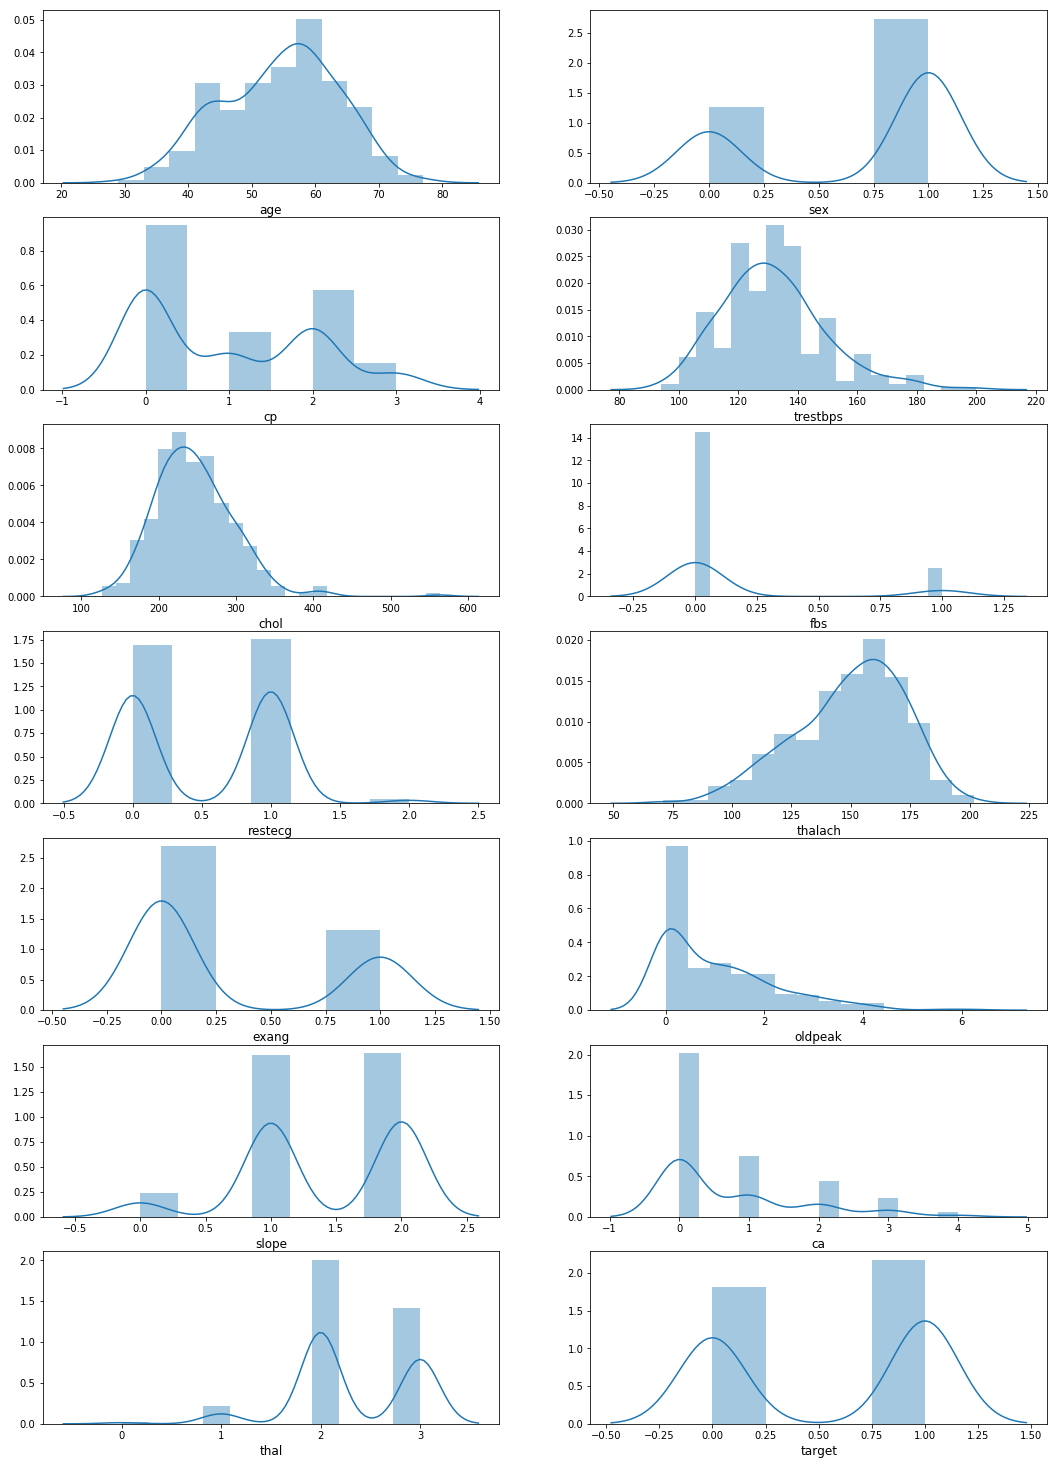

In [26]:
plot_feature_distribution(data,data.columns)

Looking at the value distributions it is easy to tell the nature of each feature (binary,cat,numerical).

In [27]:
bool_cols = ['exang','fbs','sex','target']
cat_cols = ['thal','ca','slope','cp']

In [28]:
numerical_cols = list(set(data.columns) - set(bool_cols) - set(cat_cols))
not_num_cols = list(set(data.columns) - set(numerical_cols) - set(['target']))

In [29]:
def plot_boxes(df, features):
    fig, ax = plt.subplots(3,2,figsize=(15,20))

    for i,feature in enumerate(features):
        plt.subplot(3,2,i+1)
        
        sns.boxplot(df[feature])
        
        plt.xlabel(feature, fontsize=12)

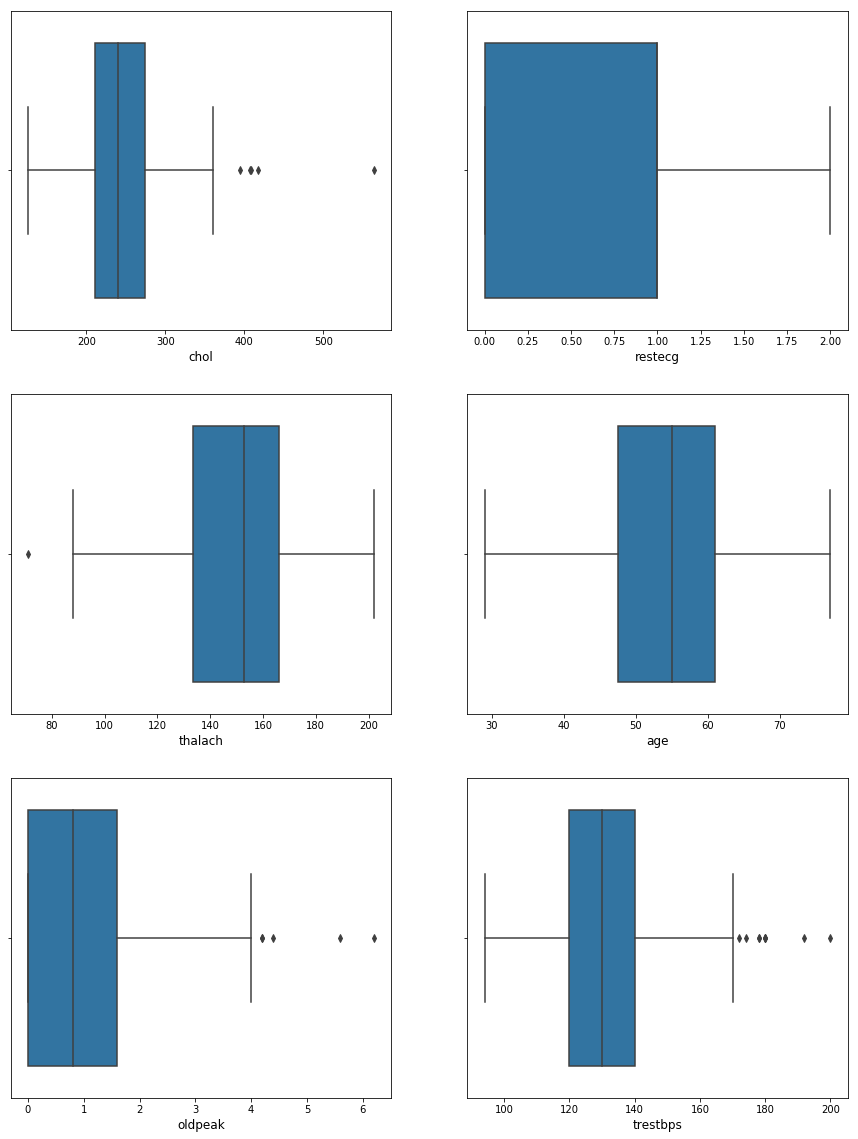

In [30]:
plot_boxes(data,numerical_cols)

There are outliers present in threstbps, chol, thalach, oldpeak.

In [45]:
data.shape

(303, 14)

IQR removes perceives values of one in column fbs as outliers, resulting in only one value left. I will not perform IQR on it.

In [50]:
columns_no_fbs = list(set(data.columns)-set(['target','fbs']))

In [51]:
Q1 = data[columns_no_fbs].quantile(0.25)
Q3 = data[columns_no_fbs].quantile(0.75)
IQR = Q3 - Q1
data_without_outliers = data[~(((data[columns_no_fbs] < (Q1 - 1.5 * IQR)) | (data[columns_no_fbs] > (Q3 + 1.5 * IQR))).any(axis=1))]

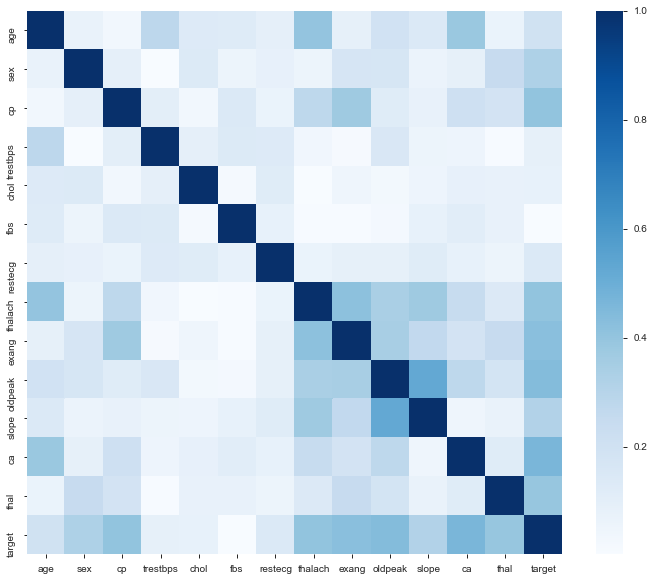

In [52]:
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(abs(data_without_outliers.corr()),cmap="Blues")

Target is quite highly correlated with a few columns, meaning linear dependence. Slope is highly correlated with oldpeak  and thalach. The target should be predicted well given that there is linear dependence between it and features.

In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [54]:
scaler = StandardScaler()
data_without_outliers[numerical_cols] = scaler.fit_transform(data_without_outliers[numerical_cols])
data_without_outliers = pd.get_dummies(data_without_outliers,columns=not_num_cols)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [55]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [56]:
pandas_profiling.ProfileReport(data_without_outliers)